In [2]:
from describe import *

# Description of the data

In [2]:
df.head()

,institution,program,degree,season,admission_status,admission_via,admission_date,ST,Date_added,notes,Undergrad_GPA,GRE_V,GRE_Q,GRE_W,GRE_sub,USnew_stat_score,USnew_overall_score
0,Iowa State University (Department of Statistics),Statistics,PhD,F20,Wait listed,Website,2020-03-08,U,2020-03-08,Expected,NaN,NaN,NaN,NaN,NaN,3.8,61.0
1,Texas A&M University--College Station (Departm...,Statistics,PhD,F20,Other,Other,2020-03-08,O,2020-03-08,To the poster below: Is the funding for 9 mont...,NaN,NaN,NaN,NaN,NaN,3.8,66.2
2,University of Massachusetts--Amherst (Departme...,Statistics,PhD,F20,Other,Other,2020-03-08,O,2020-03-08,Has anyone heard anything yet?,NaN,NaN,NaN,NaN,NaN,2.5,66.1
3,University of Massachusetts--Amherst (Departme...,Statistics,PhD,F20,Other,Other,2020-03-08,O,2020-03-08,Has anyone heard anything yet?,NaN,NaN,NaN,NaN,NaN,2.5,66.1
4,Florida State University (Department of Statis...,Statistics,PhD,F20,Accepted,E-mail,2020-03-08,I,2020-03-07,"I'm admitted on March 4, and the funding decis...",NaN,NaN,NaN,NaN,NaN,3.1,62.3


## Average timeline of admission decisions
We compare the timelines of different institutions in terms of making decisions on PhD admission. This is presented by yearly aggregated counts of events. For example, we compare **UC Davis** and **Stanford**.

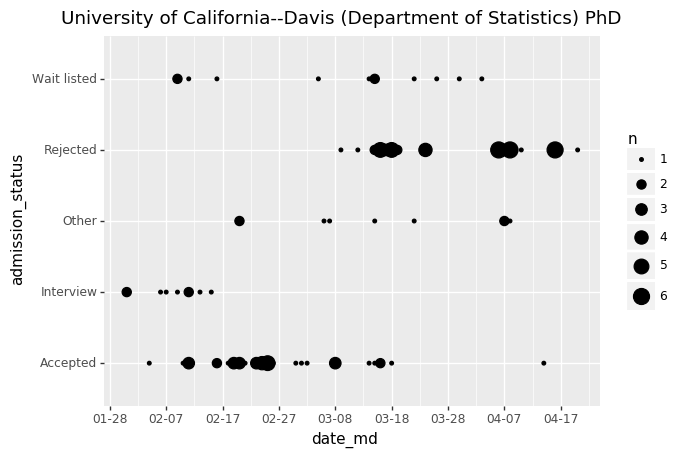

<ggplot: (-9223371933592273078)>

In [3]:
event_counts_date({"institution": "Davis", "degree": "PhD"})

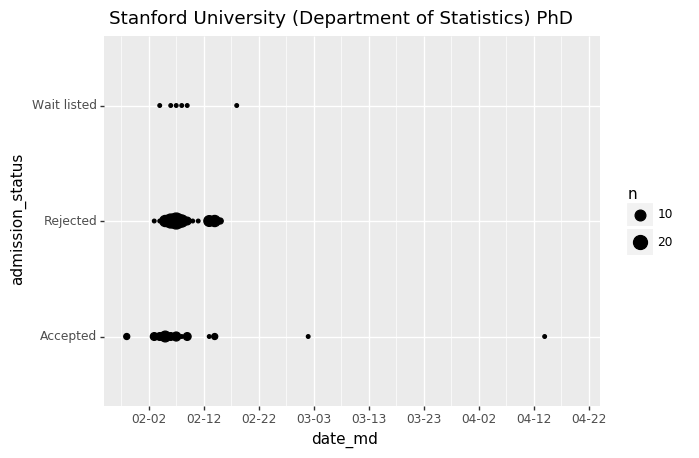

<ggplot: (103277755165)>

In [4]:
event_counts_date({"institution": "Stanford", "degree": "PhD"})

We see that Stanford is considerably earlier in terms of making decisions on admissions and rejections. Most of their decisions are made before the middle of Feburary, when UC Davis is still beginning to interview applicants and give offers. Another interesting fact is that Stanford seems to never interview applicants.

After comparing more timelines of different schools, we find that schools with higher ranking tend to make decisions earlier. This fact is consistent with our common sense.

## Which School is the hardest to get in?
Although this dataset from Gradcafe can only represent part of the applicants, it's nevertheless interesting to compare the rof acceptance among applof different programs, which we believe ometpartially reflectculty of applying this program. It 

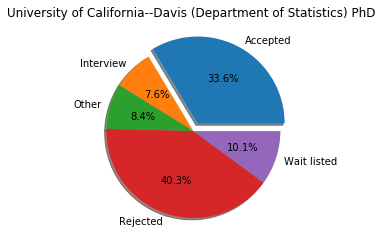

In [5]:
prop_piechart("admission_status", {
                  "institution": "Davis", "degree": "PhD"})

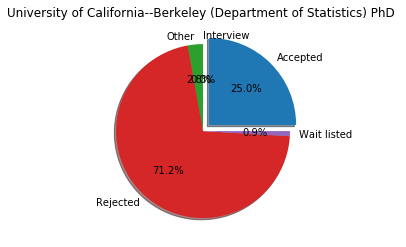

In [6]:
prop_piechart("admission_status", {
                  "institution": "Berkeley", "degree": "PhD"})

Comparing UC Davis and Berkeley, the rejection rate of Berkeley is considerably higher. Berkeley ranks top 2 in Statistics subject according to USnews, and it is very difficult to get in.

We can see which school has the lowest admission rate of Stats PhD, by an naively estimate--the count of admission divided by the sum of the counts of admission and rejection.

In [16]:
def summary_admission_prop(x):
    t = x["admission_status"].value_counts()
    return t["Accepted"] / (t["Accepted"] + t["Rejected"])
(df.loc[df["degree"] == "PhD"]).groupby(
    "institution").apply(summary_admission_prop).sort_values()[df["institution"].value_counts() >= 100]

institution
Duke University (Department of Statistical Science)                                           0.176829
University of Pennsylvania (Department of Statistics)                                         0.191667
Harvard University (Department of Statistics)                                                 0.217687
Yale University (Department of Statistics)                                                    0.246914
University of California--Berkeley (Department of Statistics)                                 0.259804
Columbia University (Department of Statistics)                                                0.262411
Cornell University (Department of Statistical Science)                                        0.276596
University of Washington (Department of Statistics)                                           0.277108
Stanford University (Department of Statistics)                                                0.277778
Carnegie Mellon University (Department of Statistics)        

However, we should keep in mind that this dataset may be a biased sample, or in other words, missing not at random. For example, people may be more likely to report their acceptance than to report rejection on Gradcafe. Therefore, we expect this acceptance rate to be an overestimate--You will not believe Purdue accept 69% of all applicants each year!

## Proportion of International Student
As PhDs in Statistics in UC Davis, we found the proportion of international students in our department to be particularly high. Is this also true for other schools?

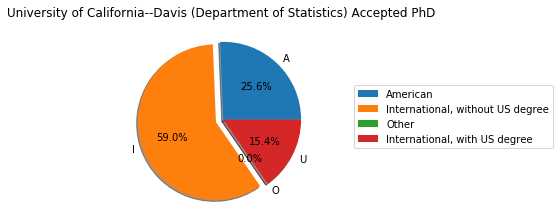

In [7]:
prop_piechart("ST", {"institution": "Davis",
                         "admission_status": "Accepted", "degree": "PhD"})

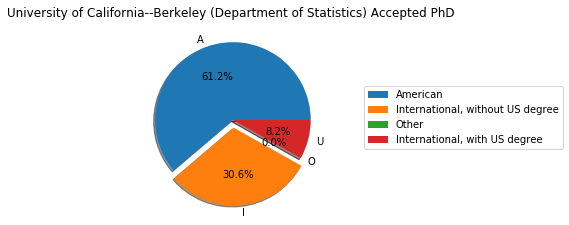

In [8]:
prop_piechart("ST", {"institution": "Berkeley",
                         "admission_status": "Accepted", "degree": "PhD"})

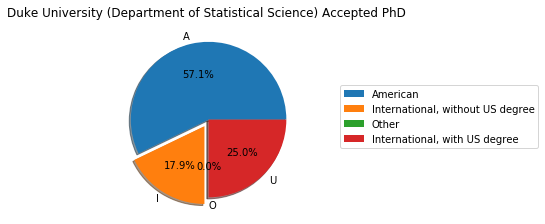

In [9]:
prop_piechart("ST", {"institution": "Duke",
                         "admission_status": "Accepted", "degree": "PhD"})

We found that many other schools, e.g. Duke and UC Berkeley, do not have so many international PhDs as in UC Davis Statistics.

We can have a look at which school prefers international students most in terms of PhD in Statistics.

In [14]:
def summary_ST_prop(x):
    t = x["ST"].value_counts()
    return t["I"]/np.sum([t[i] for i in t.index])
(df.loc[(df["admission_status"] == "Accepted") & (df["degree"] == "PhD")]).groupby(
        "institution").apply(summary_ST_prop).sort_values(ascending=False)[df["institution"].value_counts() >= 100]

institution
University of Florida (Department of Statistics)                                              0.660000
Stanford University (Department of Statistics)                                                0.625000
Columbia University (Department of Statistics)                                                0.621622
University of California--Davis (Department of Statistics)                                    0.589744
Harvard University (Department of Statistics)                                                 0.566667
University of Chicago (Department of Statistics)                                              0.527027
Yale University (Department of Statistics)                                                    0.526316
University of Pennsylvania (Department of Statistics)                                         0.500000
University of Minnesota--Twin Cities (School of Statistics)                                   0.479167
University of Michigan--Ann Arbor (Department of Statistics) 

Still, the dataset may be a biased sample of the whole applicants. We believe that the proportion of international students in this dataset is likely to be underestimated, because many international students do not report on Gradcafe (they do not even know this website).

# What do notes tell us?
I recall that last year when I used Gradcafe as an applicant, I always focused on the notes left by other applicants. There is usually lots of information given in the notes, sometimes even more relevant and valuable than other variables like GPA.

## WorldCloud: What do applicants talk about most?
The first and easiest thing we can do is to generate and compare the *WorldCloud*s generated by the notes of PhD and Master applicants, respectively.

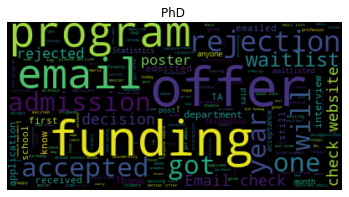

In [10]:
wordcloud_df({"degree": "PhD"})

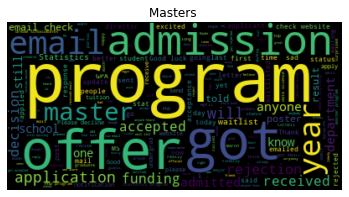

In [11]:
wordcloud_df({"degree": "Masters"})

## Predict admission status by Decision tree
To dig more into the notes, we raise an interesting question here: can we use notes only to predict one's admission status. We expect this should make sense--sometimes we can tell wheter one's result is good by justing looking at the notes he left.

20 Most Important Words:  ['please' 'funding' 'below' 'anyone' 'rejection' 'the' 'ta' 'sad' 'to'
 'offer' 'tuition' 'interview' 'accepted' 'excited' 'from' 'they'
 'rejected' 'any' 'waitlist' 'fellowship']
10-fold Cross Validation Accuracy:  0.663242266765652


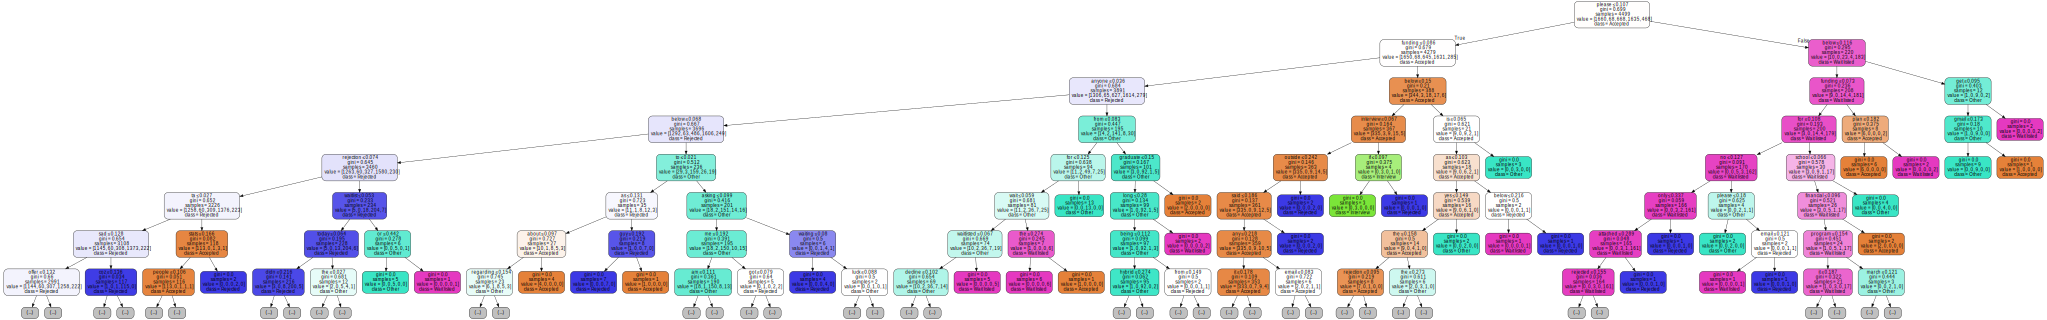

In [2]:
notes_decision_tree_classifier()

Although, as expected, the notes itself does not have much predicting power (CV accuracy: 0.66), the decision tree constructed is rather interesting. To our surprise, the most important nodes is "please". This actually makes sense. When someone says "please", he/she is very likely to be "Waitlisted"--he/she is urging those who are holding offers but not joining to decline as soon as possible.

In [13]:
for i in df["notes"].dropna()[lambda x: x.str.contains("please", case=False)].head(8):
    print(i)

'We do not rank our waitlist and cannot disclose how many people are listed on it.' 
Please decline early if you have better choices T.T Thank you so much!

'We do not rank our waitlist and cannot disclose how many people are listed on it.' 
Please decline early if you have better choices T.T Thank you so much!

On waitlist. If you decide not to go, please decline.
On waitlist. If you decide not to go, please decline.
Please decline as soon as possible if you are not going since the email said the status will update in two weeks.
For anyone who got accepted by M.A. Statistics but not going, please decline your offer. I really need this chance.
If you do not consider accepting this offer, please decline it ASAP. It is my only chance left. Thanks a lot.
Please decline ASAP if you have a better place to go. It’s really my dream school


Some other nodes on the tree also makes sense. For example, if one mentions "funding" he is likely to be accepted, while the word "sad" always means one has been rejected.